In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#This function does the same work as the one we made last time - it does 6 graphs all in bulk: Hist, PMF, CDF, PDF, normal and lognormal prob plots. 
#One addition is the rnd=0 thing. That's how we can make one of those optional paramaters, if you don't provide anything there, the hist will have no
#rounding; if you provide a number, the histogram will round to that many digits. 
def bigGraph(df_in, columnName, rnd=0):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

In [3]:
#Load the data
df_tr = pd.read_csv("LabourTrainingEvaluationData.csv")
df_tr.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


Age Task: 
o	Make and plot a Hist and Pmf for age.
o	What fraction of the people in the data are 51? What fraction are older than 51?
o	What is the median age? Does the distribution of the sample data seem to mirror the working age population?

In [4]:
#Get the age
age = df_tr["Age"]

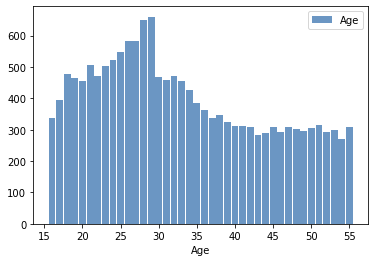

In [5]:
#Make and plot a Hist age
agehist = thinkstats2.Hist(age, label="Age")
thinkplot.preplot(1)
thinkplot.Hist(agehist)
thinkplot.Config(xlabel='Age')

In [6]:
#Make and plot a PMF
agepmf = thinkstats2.Pmf(age)

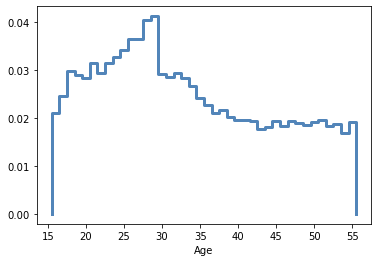

<Figure size 576x432 with 0 Axes>

In [7]:
thinkplot.PrePlot(1)
thinkplot.Pmfs([agepmf])
thinkplot.Show(xlabel="Age")

What fraction of the people in the data are 51? What fraction are older than 51?

In [29]:
age51 = df_tr[df_tr["Age"] == 51]
age51.describe(include="all")

# So the total is 314/15992  for people who are 51

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,1171.000000,1171,1171,1171,1171,1171.000000,1171.000000,1171.000000,1171.000000
unique,NaN,5,2,2,2,NaN,NaN,NaN,NaN
top,NaN,LessThanHighSchool,NotBlack,NotHispanic,Married,NaN,NaN,NaN,NaN
freq,NaN,502,1096,1087,1017,NaN,NaN,NaN,NaN
mean,53.503843,NaN,NaN,NaN,NaN,0.428693,16484.214637,15544.594755,14254.840889
std,1.130287,NaN,NaN,NaN,NaN,0.495101,9434.939058,9178.035205,10187.787234
min,52.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,0.000000,9669.961500,8453.903500,2360.668000
50%,53.000000,NaN,NaN,NaN,NaN,0.000000,19089.140000,17717.030000,15827.930000
75%,55.000000,NaN,NaN,NaN,NaN,1.000000,25862.320000,25243.550000,25564.670000


In [30]:
#People over 51
over51 = df_tr[df_tr["Age"] > 51]
over51.describe(include="all")
# the fraction is 11711/15992

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,1171.000000,1171,1171,1171,1171,1171.000000,1171.000000,1171.000000,1171.000000
unique,NaN,5,2,2,2,NaN,NaN,NaN,NaN
top,NaN,LessThanHighSchool,NotBlack,NotHispanic,Married,NaN,NaN,NaN,NaN
freq,NaN,502,1096,1087,1017,NaN,NaN,NaN,NaN
mean,53.503843,NaN,NaN,NaN,NaN,0.428693,16484.214637,15544.594755,14254.840889
std,1.130287,NaN,NaN,NaN,NaN,0.495101,9434.939058,9178.035205,10187.787234
min,52.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,0.000000,9669.961500,8453.903500,2360.668000
50%,53.000000,NaN,NaN,NaN,NaN,0.000000,19089.140000,17717.030000,15827.930000
75%,55.000000,NaN,NaN,NaN,NaN,1.000000,25862.320000,25243.550000,25564.670000


In [9]:
#What is the median of the age
print("The Median of age is: ", age.median())

The Median of age is:  31.0


•	Demographics:
o	Consider some of the demographic features: Education, Race, Hisp, MaritalStatus, and Nodeg. This data came from the United States, does it appear to be a representative sample of the US population? Demonstrate this in some way in your code. 

In [10]:
#Look for categorical and numerical features
df_tr.head(60)
#Yes 

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.6700,25243.5500,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.9710,5852.5650,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.0200,25130.7600,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.3700,25243.5500,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.2950,10727.6100,9860.869
5,22,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16365.7600,18449.2700,25564.670
6,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16804.6300,16354.6000,18059.300
7,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,1144.2120,3620.0320,15739.270
8,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.3200,25243.5500,25564.670
9,45,HighSchool,NotBlack,NotHispanic,Married,0,25862.3200,0.0000,3924.842


•	Earnings:
o	Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.

What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?

C:\Users\Patrick\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


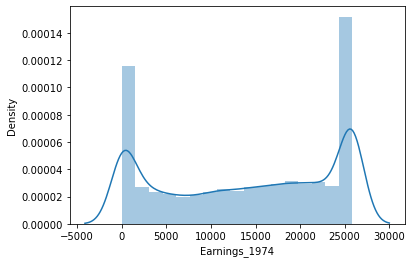

C:\Users\Patrick\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


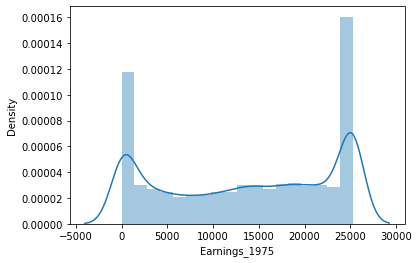

C:\Users\Patrick\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


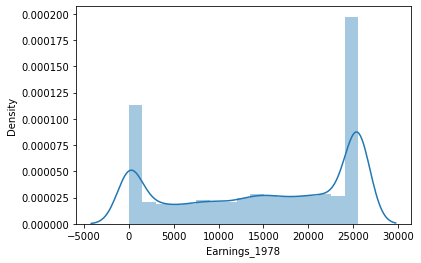

In [11]:
sns.distplot(df_tr["Earnings_1974"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"})
plt.show()
sns.distplot(df_tr["Earnings_1975"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"})
plt.show()
sns.distplot(df_tr["Earnings_1978"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"})
plt.show()

Basically there is a very very tiny change in between the years and more people earn 25000 at the 2nd hill and at the end of the line there are very pople earn 30000 at 1978

o	Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? What could you investigate further in an attempt to explain this?

According the data above like on demographics we can see people who are Notblack, NotHispanic, are Married and people have Nodeg 1 earn more than the rest and  another way can investigate is also look at the education coulmn 

o	Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.

C:\Users\Patrick\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Patrick\Documents\GitHub\Assignment1-Stats\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


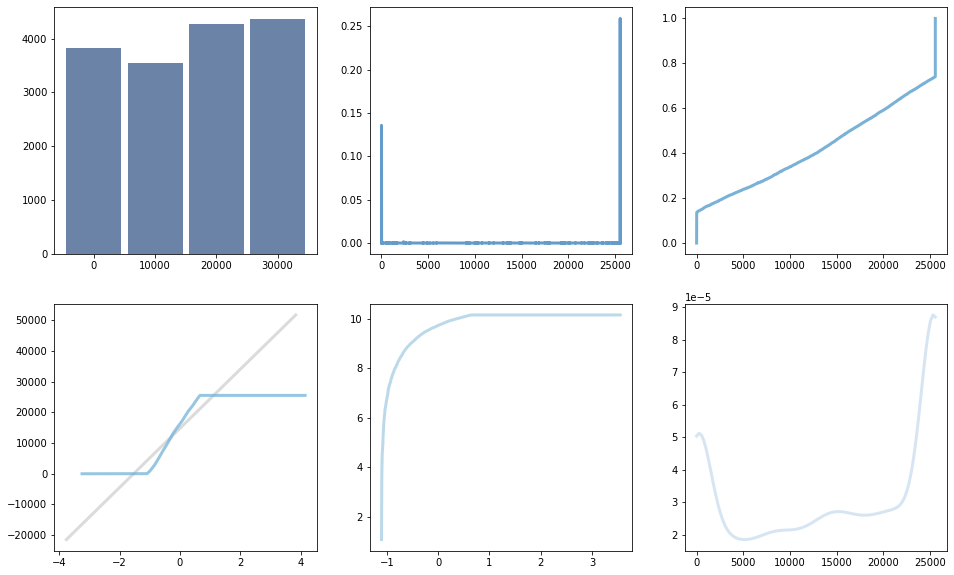

In [20]:
# Make Hist and PMF for 1978  
bigGraph(df_tr, "Earnings_1978", -4)

In [25]:
#cohort part
def cohort (df_in, cohort1, cohort2, cohort3, earningsColumn):
    df_in["Cohort"] = (df_in[cohort1]+df_in[cohort2]+df_in[cohort3])

    cohortList = df_in["Cohort"].unique()
    i = 0
    resList = []
    lowest = -1
    while i < cohortList.size:
        tmp = df_in[df_in.Cohort == cohortList[i]]
        cohortMed = np.median(pd.to_numeric(tmp[earningsColumn]))
        tmpTuple = (cohortList[i], cohortMed)
        resList.append(tmpTuple)
        if ((cohortMed < lowest) (lowest == -1)):
            lowest = cohortMed
        i = i + 1
    return lowest



The reason why I pick pick gragh 4 is becuase is the cleanest compare to others and is eeasy to look at 

o	What is the difference in median income between the groups? Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.

In [33]:
Earnings78 = df_tr["Earnings_1978"]

print("The difference is ", Earnings78.median())
# The differnce could be the people race so like people who are not certain races earn more.

The difference is  16421.975


o	Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. What can you infer from the presence of outliers that may impact analysis of this data

In [36]:
#code part
Earnings78.describe(include="all")
#Could be zeros in the data becuase people don't have a value 

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64